# Building the model

## Importing the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Loading the dataset 

In [2]:
df = pd.read_csv("IceCreamData.csv")
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


## Summarizing  the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Splitting the dataset into x and y
Where x is the independent variable and y is the dependent variable

In [4]:
x = df['Temperature']
y = df['Revenue']

## Visualizing the dataset 

Text(0.5, 1.0, 'Temperature vs Revenue')

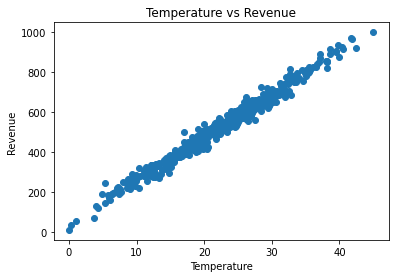

In [5]:
plt.scatter(x,y)
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.title("Temperature vs Revenue")

## Splitting the dataset into test and train

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train = np.array([x_train])

## Training the model 

In [7]:
model = LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)

LinearRegression()

## Testing the model

In [8]:
y_pred = model.predict(np.array([x_test]).reshape(-1,1))
print("The accuracy of the model is", r2_score(y_test,y_pred)*100)

The accuracy of the model is 97.49316532342856


## Visualizing the best fit curve 

Text(0.5, 1.0, 'Best fit line')

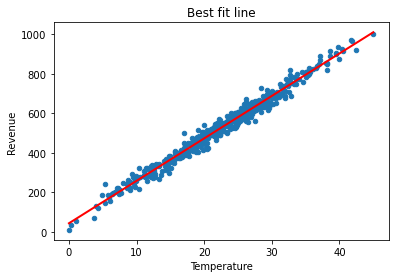

In [9]:
x_new = pd.DataFrame({'Temperature':[df.Temperature.min(),df.Temperature.max()]})
pred = model.predict(x_new)
df.plot(kind='scatter',x='Temperature',y='Revenue')
plt.plot(x_new,pred,c='red',linewidth=2)
plt.title("Best fit line")

## Exporting the model using pickle 

In [10]:
with open('model.pkl','wb') as files:
    pickle.dump(model,files)